In [48]:
from ScatterSim.NanoObjects import SphereNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


#http://jupyter.org/widgets.html

<IPython.core.display.Javascript object>


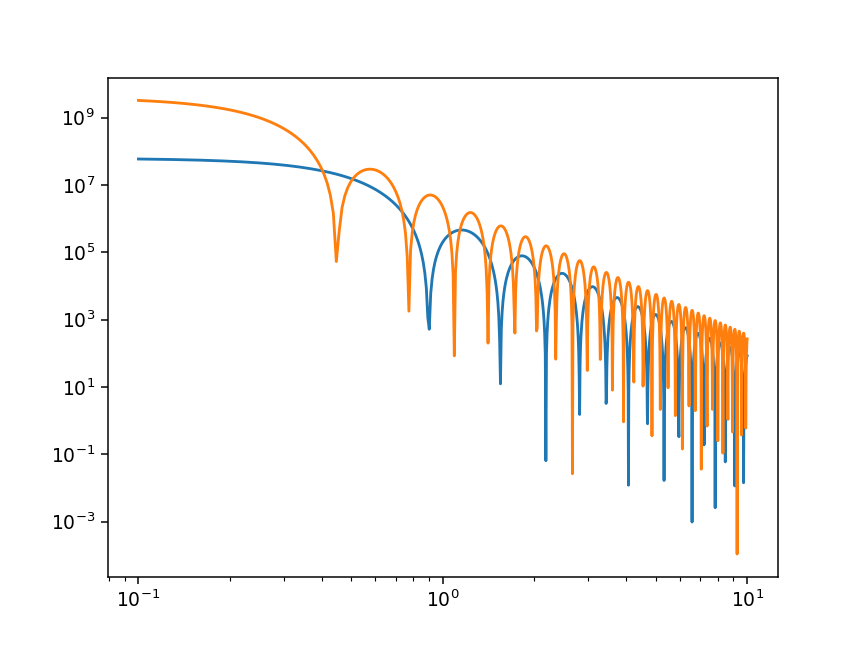

In [49]:
pargs_sphere1 = {'radius' : 5}
sphere1 = SphereNanoObject(pargs_sphere1)


pargs_sphere2 = {'radius' : 10}
sphere2 = SphereNanoObject(pargs_sphere2)

q = np.linspace(0.1, 10, 1000)
peak = PeakShape(delta=0.03, nu=0.01) 
lattice_spacing = 10.

sq_sphere1= sphere1.form_factor_squared_isotropic(q)
sq_sphere2=sphere2.form_factor_squared_isotropic(q)

plt.figure(0);
plt.clf()
plt.loglog(q, sq_sphere1)


# even with a small polydispersity (4%), polydisperse sphere scattering looks much different
#plt.figure(1);
#plt.clf()
plt.loglog(q, sq_sphere2)


In [50]:
lat_fcc1 = FCCLattice([sphere1], lattice_spacing_a=lattice_spacing)
Iq_fcc1 = lat_fcc1.intensity(q, peak)
Sq_fcc1 = lat_fcc1.structure_factor_isotropic(q, peak)
print("Finished calculating Face Centered Cubic 1")


lat_fcc2 = FCCLattice([sphere2], lattice_spacing_a=lattice_spacing)
Iq_fcc2 = lat_fcc2.intensity(q, peak)
Sq_fcc2 = lat_fcc2.structure_factor_isotropic(q, peak)
print("Finished calculating Face Centered Cubic 2")



Finished calculating Face Centered Cubic 1
Finished calculating Face Centered Cubic 2


<IPython.core.display.Javascript object>


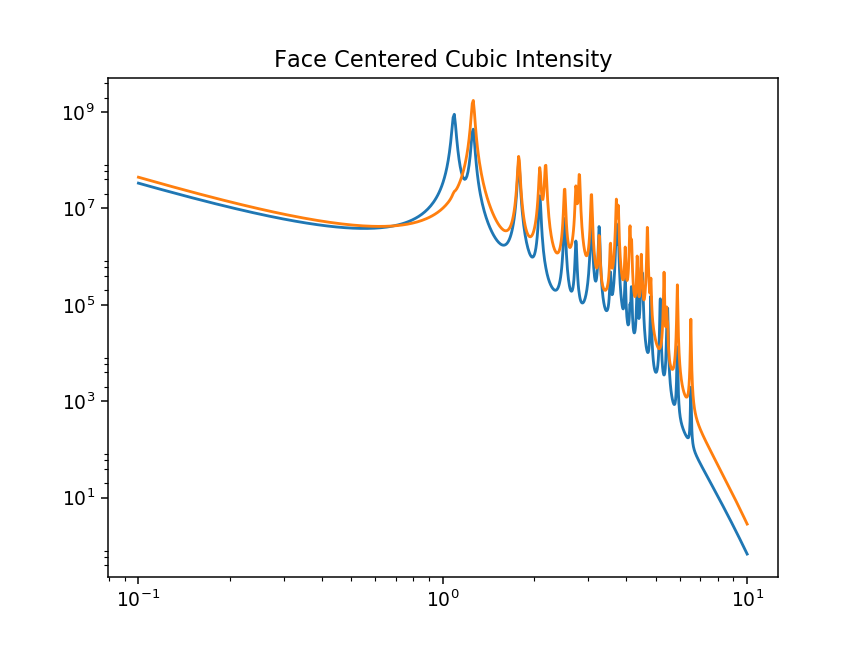

In [57]:
plt.figure(2);
plt.clf()
plt.title("Face Centered Cubic Intensity")
plt.loglog(q, Iq_fcc1)
plt.loglog(q, Iq_fcc2)


In [52]:
from ScatterSim.CompositeNanoObjects import CompositeNanoObject, OctahedronNanoObject
from ScatterSim.NanoObjects import PyramidNanoObject

In [53]:
def show_projections(V_xy, V_xz, V_yz, height, num=4):
    '''plot the xy, xz, and yz projections with height used from 
        projections function, in figure num
    '''
    extent = [-height, height, height, -height]
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(V_xy,extent=extent)
    plt.subplot(2,2,2)
    plt.title("y-z plane")
    plt.imshow(V_yz,extent=extent)
    plt.subplot(2,2,3)
    plt.title("x-z plane")
    plt.imshow(V_xz,extent=extent)

In [103]:
#Pyramids Attempt

py_pargs_bottom = {'radius':2, 'phi':90}
py_pargs_top = {'radius':2, 'phi':-90 }

py_obj = [PyramidNanoObject,PyramidNanoObject]

py_params = [py_pargs_bottom, py_pargs_top]


pyramids = CompositeNanoObject(py_obj,py_params,pargs={})

rmax = 4
V_xy, V_yz, V_xz = pyramids.projections(rmax)




<IPython.core.display.Javascript object>


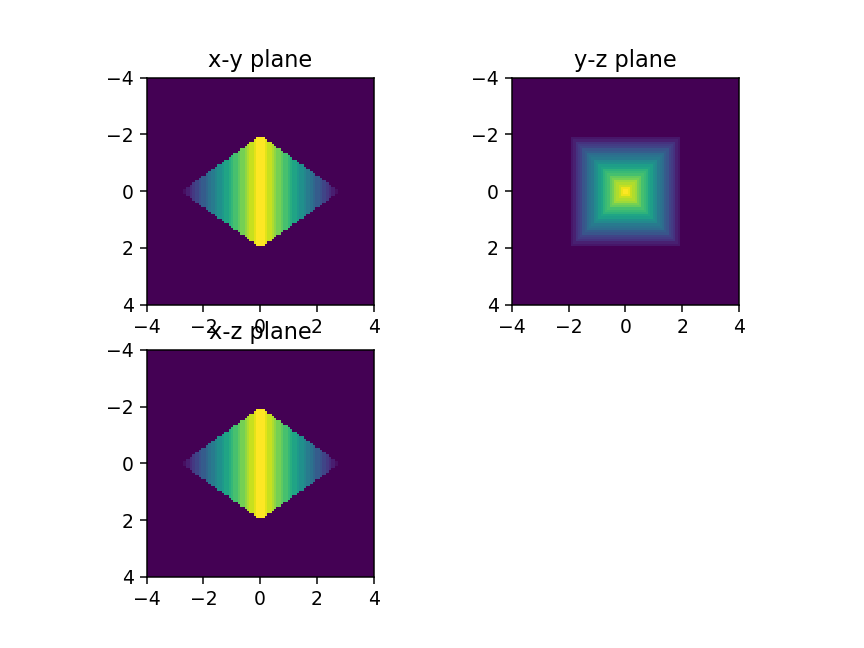

In [104]:
plt.figure(3);
plt.clf()
show_projections(V_xy, V_yz, V_xz, rmax, num=3)

In [105]:
sq_octahedron_solid = pyramids.form_factor_squared_isotropic(q)

<IPython.core.display.Javascript object>


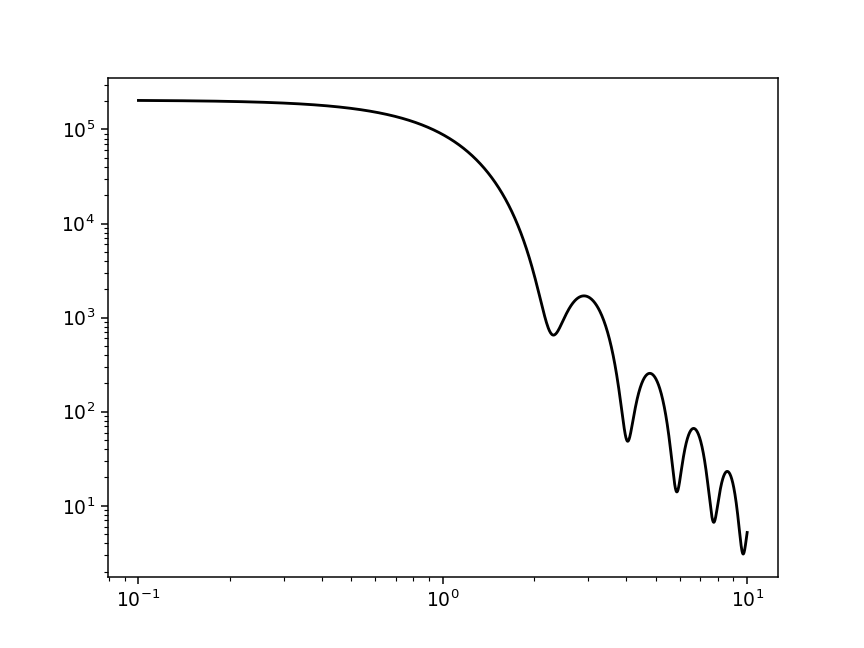

In [106]:
plt.figure(4);
plt.clf()
plt.loglog(q, sq_octahedron_solid,color='k', label="one solid octa")